<a href="https://colab.research.google.com/github/suryanshsh/Machine-Learning-Mini-Projects/blob/master/CNN_model_on_CIFAR_10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras 
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 303s 2us/step


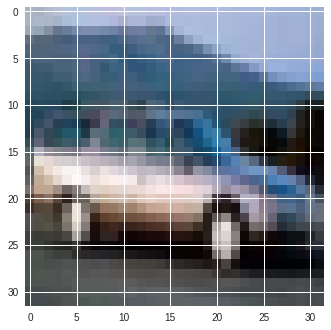

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

plt.imshow(np.squeeze(X_train[4]))


In [4]:
X_test[0].shape

(32, 32, 3)

In [0]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


In [6]:
from keras.utils import np_utils

num_classes = len(np.unique(y_train))
y_train  = keras.utils.to_categorical(y_train, num_classes)
y_test= keras.utils.to_categorical(y_test,num_classes)
(X_train,X_validation) = X_train[5000:],X_train[:5000]
(y_train,y_validation) = y_train[5000:],y_train[:5000]

print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_validation.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten


In [8]:
model= Sequential()
model.add(Conv2D(filters = 16 , kernel_size =2 , padding = 'same',activation='relu', input_shape = (32,32,3)))
model.add(MaxPool2D(pool_size = 2 ))
model.add(Conv2D(filters = 32 , kernel_size =2 , padding = 'same'))
model.add(MaxPool2D(pool_size = 2 ))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10,activation="softmax"))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxP

In [0]:
model.compile(loss='categorical_crossentropy',optimizer="rmsprop",metrics=['accuracy'])

In [10]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath = 'Modelbest.hdf5',verbose=1,save_best_only=True)

hist = model.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_validation,y_validation),verbose=2 ,shuffle=True,callbacks=[checkpoint])

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 16s - loss: 1.5738 - acc: 0.4297 - val_loss: 1.2440 - val_acc: 0.5460

Epoch 00001: val_loss improved from inf to 1.24403, saving model to Modelbest.hdf5
Epoch 2/100
 - 11s - loss: 1.2448 - acc: 0.5554 - val_loss: 1.1233 - val_acc: 0.5996

Epoch 00002: val_loss improved from 1.24403 to 1.12333, saving model to Modelbest.hdf5
Epoch 3/100
 - 11s - loss: 1.1240 - acc: 0.6026 - val_loss: 1.0742 - val_acc: 0.6184

Epoch 00003: val_loss improved from 1.12333 to 1.07424, saving model to Modelbest.hdf5
Epoch 4/100
 - 11s - loss: 1.0527 - acc: 0.6343 - val_loss: 0.9684 - val_acc: 0.6552

Epoch 00004: val_loss improved from 1.07424 to 0.96843, saving model to Modelbest.hdf5
Epoch 5/100
 - 11s - loss: 1.0136 - acc: 0.6493 - val_loss: 1.0217 - val_acc: 0.6474

Epoch 00005: val_loss did not improve from 0.96843
Epoch 6/100
 - 11s - loss: 0.9920 - acc: 0.6585 - val_loss: 1.4235 - val_acc: 

In [0]:
model.load_weights("Modelbest.hdf5")

In [13]:
score = model.evaluate(X_test,y_test,verbose=0)
print("accuracy is {}".format(score[1]))

y_hat = model.predict(X_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

accuracy is 0.6813


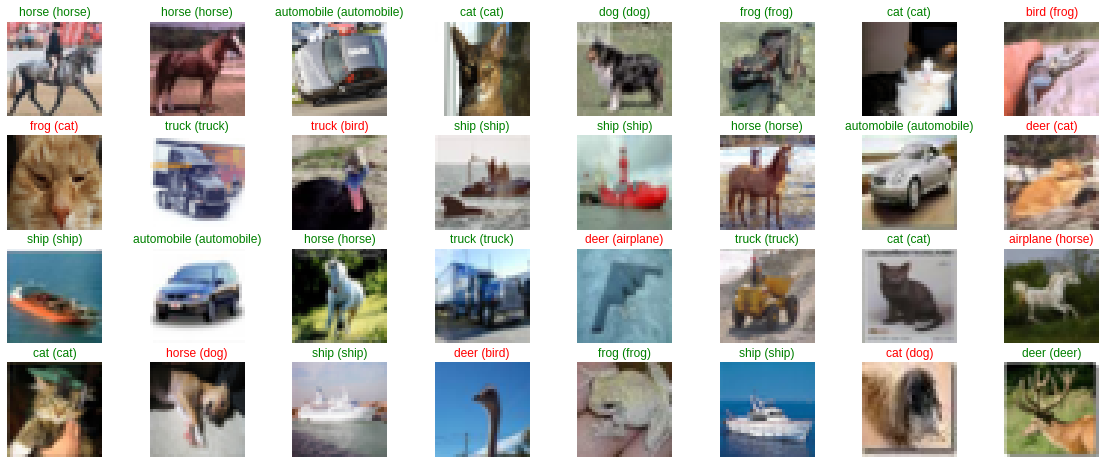

In [15]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))